In [1]:
import os
import pandas as pd
import string
from datetime import datetime
from os import path
import json
import numpy as np
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open(path.expanduser("~") + "/sys_specific.json") as file: 
    params = json.load(file)
_HOME_ = params["home"] + "/PHD"

In [3]:
with open(_HOME_ + "/ISPRA_20152017_Analysis/params.json") as file: 
    params = json.load(file)
best_path = params["best_path"]
best_path_sard = params["best_path_sard"]
ordered_regions = params["ordered_regions"]
seasons = params["seasons"]
sorted_season = params["sorted_season"]
sea_index = params["sea_index"]
ordered_id = params["ordered_id"]
sea_index_array = np.array(list(sea_index.values()))
del params

In [4]:
df_chem_phys = pd.read_csv(_HOME_ + "/ISPRA_20152017_Analysis/Create_dataset/df_chem_phys_mod_data.csv")

In [5]:
df_chem_phys["id"] = pd.Categorical(df_chem_phys["id"], categories=ordered_id, ordered=True)
df_chem_phys["Region"] = pd.Categorical(df_chem_phys["Region"], categories=ordered_regions, ordered=True)
df_chem_phys["Date"] = pd.to_datetime(df_chem_phys["Date"])
df_chem_phys["SampleDepth"] = df_chem_phys["SampleDepth"].astype("float")

In [15]:
df_chem_phys.sort_values(["id", "Date", "SampleDepth", "Concentration"]).drop_duplicates(["id", "Date", "Concentration"], keep="first")

,id,Date,Region,SampleDepth,Concentration,QF,Nutrient
206635,ITA06SMTS1,2015-07-31,Friuli-Venezia-Giulia,0.5,0.0100,NaN,PO4
206632,ITA06SMTS1,2015-07-31,Friuli-Venezia-Giulia,0.5,0.0200,NaN,NO3
206633,ITA06SMTS1,2015-07-31,Friuli-Venezia-Giulia,0.5,0.0310,NaN,NO2
206630,ITA06SMTS1,2015-07-31,Friuli-Venezia-Giulia,0.5,0.2000,NaN,Chla
206636,ITA06SMTS1,2015-07-31,Friuli-Venezia-Giulia,0.5,1.6600,[,SiO4
...,...,...,...,...,...,...,...
484040,0129-MS00730_TR12,2017-12-31,Sardegna,84.5,15.5230,1,T
484041,0129-MS00730_TR12,2017-12-31,Sardegna,85.5,15.4870,1,T
483857,0129-MS00730_TR12,2017-12-31,Sardegna,85.5,229.0625,1,DO
484042,0129-MS00730_TR12,2017-12-31,Sardegna,86.5,15.4810,1,T


In [32]:
indices = (df_chem_phys.groupby(["id", "Date", "Nutrient"], observed=True).agg({"SampleDepth": "min"}) > 0.5).index
below_surf = df_chem_phys.groupby(["id", "Date", "Nutrient"], observed=True).agg({"SampleDepth": "min"}) > 0.5

In [35]:
df_chem_phys.query("SampleDepth != 0.5").sort_values(["id", "Date", "SampleDepth", "Concentration"]).drop_duplicates(["id", "Date", "Concentration"], keep="first")

,id,Date,Region,SampleDepth,Concentration,QF,Nutrient
206643,ITA06SMTS1,2015-07-31,Friuli-Venezia-Giulia,1.0,0.20000,NaN,Chla
206640,ITA06SMTS1,2015-07-31,Friuli-Venezia-Giulia,1.0,6.42540,NaN,DO
206642,ITA06SMTS1,2015-07-31,Friuli-Venezia-Giulia,1.0,8.25680,NaN,pH
206638,ITA06SMTS1,2015-07-31,Friuli-Venezia-Giulia,1.0,29.28596,NaN,T
206637,ITA06SMTS1,2015-07-31,Friuli-Venezia-Giulia,1.0,35.51440,NaN,Salinity
...,...,...,...,...,...,...,...
484040,0129-MS00730_TR12,2017-12-31,Sardegna,84.5,15.52300,1,T
484041,0129-MS00730_TR12,2017-12-31,Sardegna,85.5,15.48700,1,T
483857,0129-MS00730_TR12,2017-12-31,Sardegna,85.5,229.06250,1,DO
484042,0129-MS00730_TR12,2017-12-31,Sardegna,86.5,15.48100,1,T


In [32]:
nutrients = df_chem_phys["Nutrient"].unique()

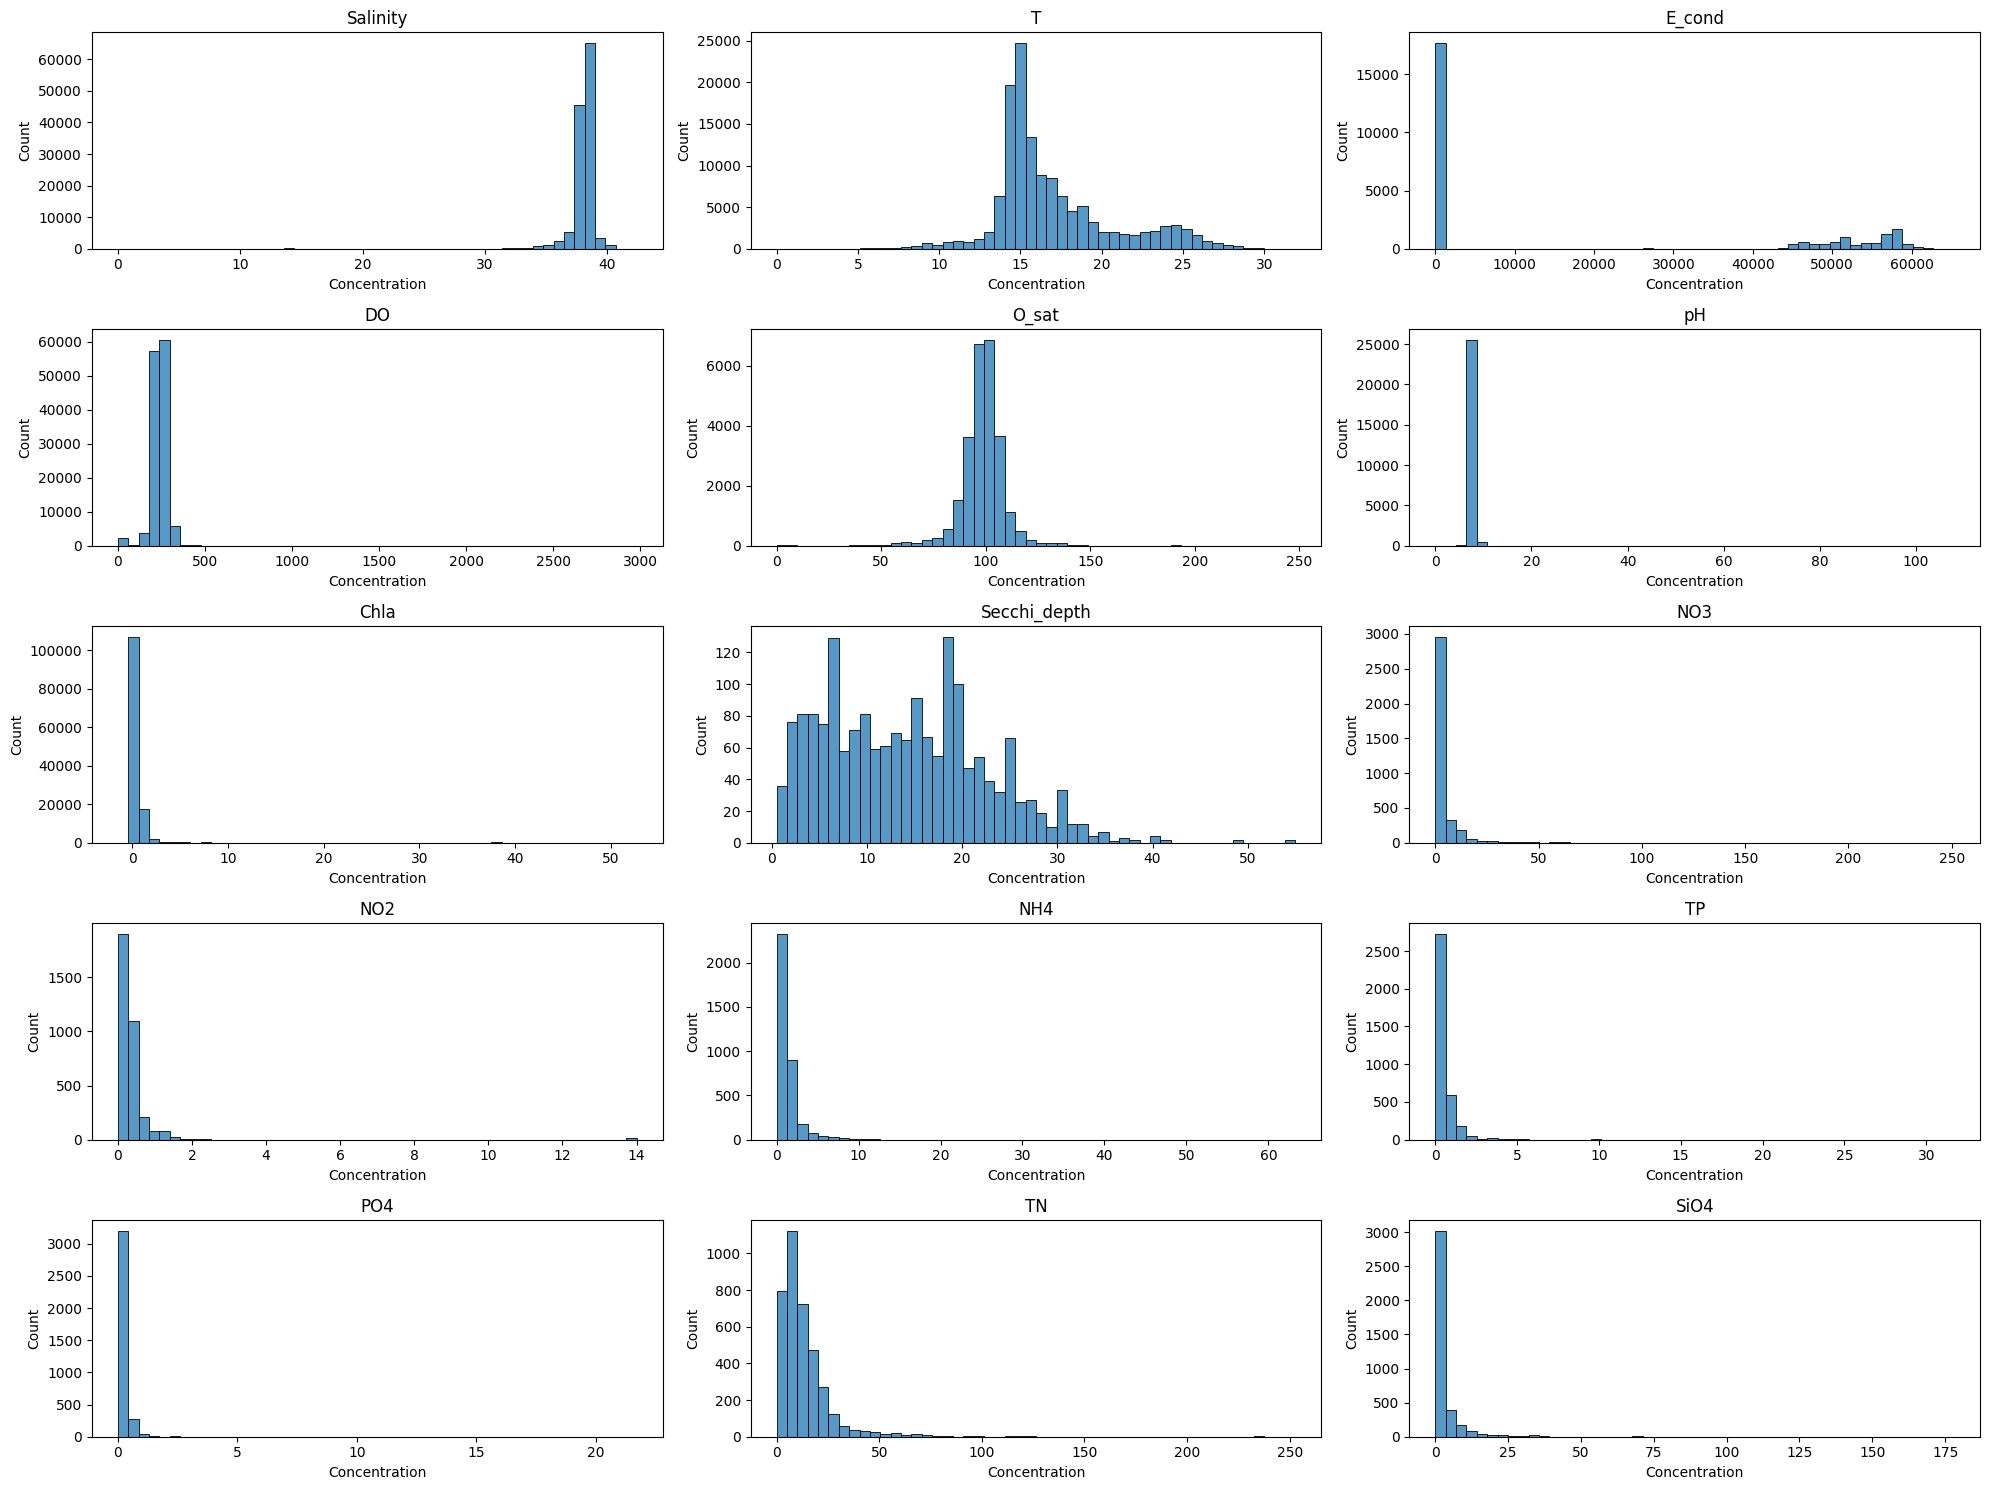

In [38]:
fig, axs = plt.subplots(5, 3, figsize=(20, 15))
axs = axs.ravel()
for (nut, ax) in zip(nutrients, axs):
    df_nut = df_chem_phys.query("Nutrient == @nut")
    sns.histplot(data=df_nut, x="Concentration", ax=ax, bins=50)
    ax.set_title(nut)
plt.tight_layout()

In [31]:
df_chem_phys.sort_values("Region")

,id,Date,Region,SampleDepth,Concentration,QF,Nutrient
209260,ITA06SMTS2,2016-07-31,Friuli-Venezia-Giulia,4.0,36.852,1,Salinity
208906,ITA06SMTS2,2016-03-31,Friuli-Venezia-Giulia,4.0,1.106,1,Chla
208907,ITA06SMTS2,2016-03-31,Friuli-Venezia-Giulia,5.0,1.179,1,Chla
208908,ITA06SMTS2,2016-03-31,Friuli-Venezia-Giulia,6.0,1.194,1,Chla
208909,ITA06SMTS2,2016-03-31,Friuli-Venezia-Giulia,7.0,1.226,1,Chla
...,...,...,...,...,...,...,...
470456,0073-MS00370_TR12,2017-04-30,Sardegna,71.5,0.870,1,Chla
470455,0073-MS00370_TR12,2017-04-30,Sardegna,70.5,0.920,1,Chla
470454,0073-MS00370_TR12,2017-04-30,Sardegna,68.5,1.070,1,Chla
470452,0073-MS00370_TR12,2017-04-30,Sardegna,66.5,1.420,1,Chla
